In [235]:
# from Bio.KEGG import Pathway
# from Bio.KEGG import Entry

from Bio.KEGG import REST

import networkx as nx
import itertools

import matplotlib.pyplot as plt

import time

# import rdflib

# from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph # didn't work well



In [197]:
human_pathways = REST.kegg_list("pathway", "hsa").read()
# human_pathways.decode("utf-8").split("\n")[0:5]
print(human_pathways)
print(type(human_pathways))
print(human_pathways[0])



hsa01100	Metabolic pathways - Homo sapiens (human)
hsa01200	Carbon metabolism - Homo sapiens (human)
hsa01210	2-Oxocarboxylic acid metabolism - Homo sapiens (human)
hsa01212	Fatty acid metabolism - Homo sapiens (human)
hsa01230	Biosynthesis of amino acids - Homo sapiens (human)
hsa01232	Nucleotide metabolism - Homo sapiens (human)
hsa01250	Biosynthesis of nucleotide sugars - Homo sapiens (human)
hsa01240	Biosynthesis of cofactors - Homo sapiens (human)
hsa00010	Glycolysis / Gluconeogenesis - Homo sapiens (human)
hsa00020	Citrate cycle (TCA cycle) - Homo sapiens (human)
hsa00030	Pentose phosphate pathway - Homo sapiens (human)
hsa00040	Pentose and glucuronate interconversions - Homo sapiens (human)
hsa00051	Fructose and mannose metabolism - Homo sapiens (human)
hsa00052	Galactose metabolism - Homo sapiens (human)
hsa00053	Ascorbate and aldarate metabolism - Homo sapiens (human)
hsa00500	Starch and sucrose metabolism - Homo sapiens (human)
hsa00520	Amino sugar and nucleotide sugar metabo

In [16]:
# Filter all human pathways for repair pathways
repair_pathways = []
for line in human_pathways.rstrip().split("\n"):
    entry, description = line.split("\t")
    if "repair" in description:
        repair_pathways.append(entry)

repair_pathways

['hsa03410', 'hsa03420', 'hsa03430']

In [18]:
# Get the genes for pathways and add them to a list
repair_genes = []
for pathway in repair_pathways:
    pathway_file = REST.kegg_get(pathway).read()  # query and read each pathway

    # iterate through each KEGG pathway file, keeping track of which section
    # of the file we're in, only read the gene in each pathway
    current_section = None
    for line in pathway_file.rstrip().split("\n"):
        section = line[:12].strip()  # section names are within 12 columns
        if not section == "":
            current_section = section

        if current_section == "GENE":
            gene_identifiers, gene_description = line[12:].split("; ")
            gene_id, gene_symbol = gene_identifiers.split()

            if not gene_symbol in repair_genes:
                repair_genes.append(gene_symbol)

print("There are %d repair pathways and %d repair genes. The genes are:" % \
        (len(repair_pathways), len(repair_genes)))
print(", ".join(repair_genes))

There are 3 repair pathways and 100 repair genes. The genes are:
OGG1, NTHL1, NEIL1, NEIL2, NEIL3, UNG, SMUG1, MUTYH, MPG, MBD4, TDG, APEX1, PNKP, TDP1, POLB, POLL, HMGB1, PARP1, PARP2, PARP3, PARP4, PARG, ADPRS, APTX, XRCC1, POLG, POLG2, LIG3, POLD1, POLD2, POLD3, POLD4, POLE, POLE2, POLE3, POLE4, PCNA, RFC1, RFC4, RFC2, RFC5, RFC3, FEN1, LIG1, RBX1, CUL4B, CUL4A, DDB1, DDB2, XPC, RAD23B, RAD23A, CETN2, ERCC8, ERCC6, UVSSA, POLR2A, POLR2B, POLR2C, POLR2D, POLR2E, POLR2F, POLR2G, POLR2H, POLR2I, POLR2L, POLR2K, POLR2J, POLR2J3, POLR2J2, POLR2M, CDK7, MNAT1, CCNH, ERCC3, ERCC2, GTF2H5, GTF2H1, GTF2H2, GTF2H2C_2, GTF2H2C, GTF2H3, GTF2H4, ERCC5, BIVM-ERCC5, XPA, RPA1, RPA2, RPA3, RPA4, ERCC4, ERCC1, SSBP1, PMS2, MLH1, MSH6, MSH2, MSH3, MLH3, EXO1


In [20]:
type(pathway_file)

str

In [10]:

request = REST.kegg_get("ec:5.4.2.2")


In [21]:
# # *** DIDN'T WORK ***
# # Get information about the KEGG pathway for glycolysis
# pathway = Pathway('ko00010')

# # Print the pathway name
# print(pathway.name)

# # Print the pathway title
# print(pathway.title)

# # Print the number of entries in the pathway
# print(len(pathway.entries))


NameError: name 'Pathway' is not defined

In [22]:
from Bio.KEGG.KGML.KGML_parser import read
pathway = read(open('KEGG/ko01100.xml', 'r'))
print(len(pathway.entries))
print(len(pathway.reactions))
print(len(pathway.maps))


FileNotFoundError: [Errno 2] No such file or directory: 'KEGG/ko01100.xml'

In [78]:
# REST.kegg_get()
# Herpes simplex virus 1 infection - Homo sapiens (human)
kgml_hsa05168 = REST.kegg_get("hsa05168", "kgml").read()
fname = "kgml_hsa05168.xml"
with open(fname, "w") as file:
    file.write(kgml_hsa05168)

In [198]:
# REST.kegg_get()
# hsa:01212 Fatty acid metabolism - Homo sapiens (human)
kgml_hsa01212 = REST.kegg_get("hsa01212", "kgml").read()
fname = "kgml_hsa01212.xml"
with open(fname, "w") as file:
    file.write(kgml_hsa01212)

In [101]:
# Try to get ortholog
# ko_entries = REST.kegg_list("ko").read()
# print(ko_entries)

kgml_K19264 = REST.kegg_get("K19264").read()
print(type(kgml_K19264))
print(kgml_K19264)
# fname = "kgml_***.xml"
# with open(fname, "w") as file:

<class 'str'>
ENTRY       K19264                      KO
SYMBOL      gD
NAME        Simplexvirus envelope glycoprotein D
PATHWAY     map03266  Virion - Herpesvirus
            map04061  Viral protein interaction with cytokine and cytokine receptor
            map05168  Herpes simplex virus 1 infection
NETWORK     nt06168  Herpes simplex virus 1 (HSV-1)
            nt06516  TNF signaling
  ELEMENT   N00560  HSV gD to HVEM-NFKB signaling pathway
BRITE       KEGG Orthology (KO) [BR:ko00001]
             09120 Genetic Information Processing
              09125 Information processing in viruses
               03266 Virion - Herpesvirus
                K19264  gD; Simplexvirus envelope glycoprotein D
             09130 Environmental Information Processing
              09133 Signaling molecules and interaction
               04061 Viral protein interaction with cytokine and cytokine receptor
                K19264  gD; Simplexvirus envelope glycoprotein D
             09160 Human Diseases
  

In [64]:
# REST.kegg_get()
# NF-kappa B signaling pathway - Homo sapiens (human)
kgml_hsa04064 = REST.kegg_get("hsa04064", "kgml").read()

In [65]:
fname = "kgml_hsa04064.xml"
with open(fname, "w") as file:
    file.write(kgml_hsa04064)

In [63]:
print(type(kgml_hsa04064))
print(kgml_hsa04064)

<class 'str'>
<?xml version="1.0"?>
<!DOCTYPE pathway SYSTEM "https://www.kegg.jp/kegg/xml/KGML_v0.7.2_.dtd">
<!-- Creation date: Apr 12, 2019 15:43:57 +0900 (GMT+9) -->
<pathway name="path:hsa04064" org="hsa" number="04064"
         title="NF-kappa B signaling pathway"
         image="https://www.kegg.jp/kegg/pathway/hsa/hsa04064.png"
         link="https://www.kegg.jp/kegg-bin/show_pathway?hsa04064">
    <entry id="5" name="path:hsa04060" type="map"
        link="https://www.kegg.jp/dbget-bin/www_bget?hsa04060">
        <graphics name="Cytokine-cytokine receptor interaction" fgcolor="#000000" bgcolor="#FFFFFF"
             type="roundrectangle" x="110" y="662" width="124" height="34"/>
    </entry>
    <entry id="6" name="hsa:598" type="gene"
        link="https://www.kegg.jp/dbget-bin/www_bget?hsa:598">
        <graphics name="BCL2L1, BCL-XL/S, BCL2L, BCLX, Bcl-X, PPP1R52" fgcolor="#000000" bgcolor="#BFFFBF"
             type="rectangle" x="967" y="334" width="46" height="17"/>
    

In [ ]:
'''
https://www.biostars.org/p/9544234/
REMEMBER: Try to use the UniProtKB format.

You can map identifiers of the form

hsa:286430

osa:4330905

mmu:76407

from KEGG to UniProtKB using the IDmapping service at https://www.uniprot.org/id-mapping
'''

'''
Okay. There are others too. I haven't found just a simple database yet though.
'''

In [143]:
# XML

# kgml_hsa05168 (HSV1)

import xml.etree.ElementTree as ET

xml_string = """
<data>
  <element1>Value 1</element1>
  <element2>Value 2</element2>
</data>
"""

# root = ET.fromstring(xml_string)

# for child in root:
#     tag_name = child.tag
#   text_content = child.text

#   print(tag_name, text_content)

G = nx.MultiDiGraph()


# class kegg_node():
    

root = ET.fromstring(kgml_hsa05168)
for child in root:
    print()
#     print("------")
#     print(dir(child))
#     print(child.tag) # says if entry, relation, etc. [if relation or reaction, add edge]
#     print(child.attrib)
    print(child.tag,child.attrib['type'])
    
    if child.tag=='entry':
        G.add_node(child.attrib['id'],**child.attrib)
    elif child.tag=='relation':
        rel_attr = {}
        for subtype in child:
            rel_attr[subtype.attrib['name']] = subtype.attrib['value']
        
        G.add_edge(child.attrib['entry1'],child.attrib['entry2'],**rel_attr)
        
    
    for subchild in child:
        if subchild.tag=='graphics':
            continue
            print('^')
        if child.tag=='relation':  # This is if child=='relation'
            print(subchild.tag,subchild.attrib['name'])
        elif child.attrib['type']=='group':  # 
            print('**',subchild.tag,subchild.attrib['id'])
        else:
            print(subchild.tag, subchild.tag)
        
        
    
    



entry map

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry ortholog

entry ortholog

entry ortholog

entry ortholog

entry gene

entry gene

entry gene

entry map

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry ortholog

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry map

entry map

entry ortholog

entry gene

entry gene

entry ortholog

entry gene

entry gene

entry gene

entry ortholog

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry ortholog

entry ortholog

entry ortholog

entry gene

entry map

entry ortholog

entry gene

entry gene

entry map

entry gene

entry ortholog

entry ortholog

entry gene

e

In [195]:
print(G)
# for node in G.nodes():
#     print(node)

node_list = [node for node in G.nodes()]
# print(node_list)

edge_list = [edge for edge in G.edges()]
# print(edge_list)

nodes_from_edges = set(itertools.chain.from_iterable(edge_list))
print(nodes_from_edges)
len(nodes_from_edges)

print("Turns out all the orthologs do *not* have edges")


MultiDiGraph with 181 nodes and 98 edges
{'286', '276', '164', '290', '388', '187', '313', '215', '343', '122', '121', '90', '196', '165', '197', '255', '336', '213', '64', '66', '50', '214', '275', '89', '312', '193', '191', '75', '173', '44', '35', '201', '385', '47', '117', '158', '383', '347', '63', '18', '337', '12', '287', '148', '123', '174', '60', '120', '124', '61', '331', '363', '103', '348', '43', '175', '54', '13', '270', '172', '74', '119', '265', '314', '332', '177', '65', '384', '386', '46', '209', '344', '194', '19', '216', '171', '130', '329', '311', '118', '45', '382', '355', '102', '324', '33', '335', '277', '272', '192', '328', '92', '195', '381', '149', '34', '62', '338', '11', '15', '330', '76', '387', '375', '17', '206'}
Turns out all the orthologs do *not* have edges


MultiDiGraph with 106 nodes and 98 edges


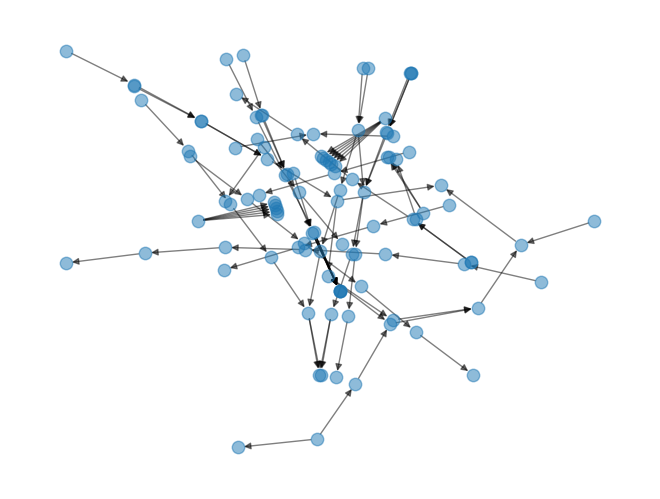

In [196]:
Gsub = G.subgraph(nodes_from_edges)
print(Gsub)
node_colors = []
# for node in G.nodes():
#     print(G.nodes[node]['type'])
#     if G.nodes[node]['type']=='ortholog':
#         print('*')
#         node_colors.append('r')
#     else:
#         node_colors.append('b')

    
#     if Gsub[node]
# [ortholog_nodes.append(node) for node in Gsub.nodes()]



# nx.draw(Gsub, node_size=100)
labels = {}
nx.draw_kamada_kawai(Gsub,node_size=80,alpha=0.5)
# nx.draw_shell(Gsub,node_size=100)

plt.show()

In [217]:
import polars
folder="/Users/nicolassawaya/hpi-repos/hpi-termite/production/"
fpath = folder + "aldopaths1_kegg2uniprot.tsv"
df_kegg2uniprot = polars.read_csv(fpath,separator='\t')#, truncate_ragged_lines=True)
print(df_kegg2uniprot)

print( df_kegg2uniprot.columns )

# Print out all of column 'Entry Name' and 'Entry name'
uniprot_ids = df_kegg2uniprot.get_column("Entry")
print(list(uniprot_ids))
# Save all uniprot genes to file
with open('aldopaths1_uniprot_genes.txt','w') as f:
    for gene in uniprot_ids:
        f.write(gene+'\n')
uniprot_ids = df_kegg2uniprot.get_column("Entry Name")
print(list(uniprot_ids))
# Save all uniprot genes to file
with open('aldopaths1_uniprot_genes_entryname.txt','w') as f:
    for gene in uniprot_ids:
        f.write(gene+'\n')

shape: (14_686, 8)
┌───────────┬────────┬────────────┬─────────────┬─────────────┬─────────────┬─────────────┬────────┐
│ From      ┆ Entry  ┆ Reviewed   ┆ Entry Name  ┆ Protein     ┆ Gene Names  ┆ Organism    ┆ Length │
│ ---       ┆ ---    ┆ ---        ┆ ---         ┆ names       ┆ ---         ┆ ---         ┆ ---    │
│ str       ┆ str    ┆ str        ┆ str         ┆ ---         ┆ str         ┆ str         ┆ i64    │
│           ┆        ┆            ┆             ┆ str         ┆             ┆             ┆        │
╞═══════════╪════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╪════════╡
│ hsa:64388 ┆ Q9H772 ┆ reviewed   ┆ GREM2_HUMAN ┆ Gremlin-2   ┆ GREM2       ┆ Homo        ┆ 168    │
│           ┆        ┆            ┆             ┆ (Cysteine   ┆ CKTSF1B2    ┆ sapiens     ┆        │
│           ┆        ┆            ┆             ┆ knot        ┆ DAND3 PRDC  ┆ (Human)     ┆        │
│           ┆        ┆            ┆             ┆ superfa…    ┆         

In [234]:
# Filter the DataFrame to select rows where "HHV" is in string in column "Entry Name"
filtered_df = df_kegg2uniprot.filter( polars.col("Entry Name").str.contains("HHV") )

# Print the filtered DataFrame
# print(filtered_df)
entries = filtered_df.get_column('Entry')
# print(list(entries))
entry_names = filtered_df.get_column('Entry Name')
# print(list(entry_names))


'''
OKAY. So it is in fact the "entry_name" that is in the big VIRUS-STRING-DB file.
'''

hhv_path = "/Users/nicolassawaya/hpi-local/hpi-big-files/hhv.txt"
with open(hhv_path) as f:
    for line in f:
        for gene in entry_names:
            if gene in line:
                print(gene)
                print(line)
                print()



VP16_HHV11
3702.AT1G25540.1 10298.VP16_HHV11 435


RIR1_HHV2H
4932.YBR109C 10310.RIR1_HHV2H 800


RNB_HHV11
4932.YDL064W 10298.RNB_HHV11 800


RNB_HHV11
4932.YGR162W 10298.RNB_HHV11 800


VFLIP_HHV8P
4932.YNR007C 37296.VFLIP_HHV8P 800


VP16_HHV11
4932.YPR086W 10298.VP16_HHV11 800


ICP22_HHV11
7227.FBpp0071848 10298.ICP22_HHV11 800


VGPCR_HHV8P
7227.FBpp0077011 37296.VGPCR_HHV8P 800


ICP27_HHV11
7227.FBpp0078754 10298.ICP27_HHV11 800


ICP34_HHV11
7227.FBpp0083975 10298.ICP34_HHV11 800


GB_HHV11
7227.FBpp0084068 10298.GB_HHV11 800


K7_HHV8P
7227.FBpp0085443 37296.K7_HHV8P 800


VP16_HHV11
7227.FBpp0088193 10298.VP16_HHV11 800


VP16_HHV11
7227.FBpp0111554 10298.VP16_HHV11 800


VP16_HHV11
7227.FBpp0305673 10298.VP16_HHV11 800


VP16_HHV11
7244.FBpp0228181 10298.VP16_HHV11 800


VFLIP_HHV8P
7955.ENSDARP00000094416 37296.VFLIP_HHV8P 800


UL13_HHV11
8364.ENSXETP00000014678 10298.UL13_HHV11 800


ICP22_HHV11
8364.ENSXETP00000031527 10298.ICP22_HHV11 800


ICP27_HHV11
8364.ENSXETP0000

GD_HHV11
9606.ENSP00000252723 10298.GD_HHV11 202


GK_HHV11
9606.ENSP00000252723 10298.GK_HHV11 171


GG_HHV11
9606.ENSP00000252723 10298.GG_HHV11 185


GB_HHV11
9606.ENSP00000252723 10298.GB_HHV11 194


GM_HHV11
9606.ENSP00000252723 10298.GM_HHV11 187


ORF50_HHV8P
9606.ENSP00000252797 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000252797 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000252799 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000252799 10298.GB_HHV11 227


VGPCR_HHV8P
9606.ENSP00000252804 37296.VGPCR_HHV8P 509


VGCR_HHV6Z
9606.ENSP00000252804 32604.VGCR_HHV6Z 509


VU51_HHV6Z
9606.ENSP00000252804 32604.VU51_HHV6Z 509


ORF50_HHV8P
9606.ENSP00000252818 37296.ORF50_HHV8P 692


GB_HHV11
9606.ENSP00000252840 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000252840 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000252979 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000252979 37296.ORF50_HHV8P 291


ORF50_HHV8P
9606.ENSP00000252996 37296.ORF50_HHV8P 706


VGCR_HHV6Z
9606.ENSP00000253055 

GB_HHV11
9606.ENSP00000270617 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000270617 37296.ORF50_HHV8P 291


RNB_HHV11
9606.ENSP00000270625 10298.RNB_HHV11 447


GB_HHV11
9606.ENSP00000270649 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000270649 37296.ORF50_HHV8P 291


ORF50_HHV8P
9606.ENSP00000270722 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000270722 10298.GB_HHV11 227


VU51_HHV6Z
9606.ENSP00000270879 32604.VU51_HHV6Z 459


VGPCR_HHV8P
9606.ENSP00000270879 37296.VGPCR_HHV8P 459


VGCR_HHV6Z
9606.ENSP00000270879 32604.VGCR_HHV6Z 459


ORF50_HHV8P
9606.ENSP00000271715 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000271715 10298.GB_HHV11 227


US03_HHV11
9606.ENSP00000272065 10298.US03_HHV11 443


GM_HHV11
9606.ENSP00000272102 10298.GM_HHV11 336


US03_HHV11
9606.ENSP00000272163 10298.US03_HHV11 197


GK_HHV11
9606.ENSP00000272163 10298.GK_HHV11 170


GJ_HHV11
9606.ENSP00000272163 10298.GJ_HHV11 209


GL_HHV11
9606.ENSP00000272163 10298.GL_HHV11 198


GD_HHV11
9606.ENSP00000272163 1029

VU51_HHV6Z
9606.ENSP00000302621 32604.VU51_HHV6Z 156


VGCR_HHV6Z
9606.ENSP00000302621 32604.VGCR_HHV6Z 156


VGPCR_HHV8P
9606.ENSP00000302621 37296.VGPCR_HHV8P 156


GB_HHV11
9606.ENSP00000302621 10298.GB_HHV11 392


GD_HHV11
9606.ENSP00000302629 10298.GD_HHV11 485


GG_HHV11
9606.ENSP00000302629 10298.GG_HHV11 485


GI_HHV11
9606.ENSP00000302629 10298.GI_HHV11 485


ORF50_HHV8P
9606.ENSP00000302640 37296.ORF50_HHV8P 336


GJ_HHV11
9606.ENSP00000302665 10298.GJ_HHV11 303


GL_HHV11
9606.ENSP00000302665 10298.GL_HHV11 316


GD_HHV11
9606.ENSP00000302665 10298.GD_HHV11 184


GB_HHV11
9606.ENSP00000302665 10298.GB_HHV11 171


GK_HHV11
9606.ENSP00000302665 10298.GK_HHV11 177


GG_HHV11
9606.ENSP00000302665 10298.GG_HHV11 175


GM_HHV11
9606.ENSP00000302665 10298.GM_HHV11 165


GB_HHV11
9606.ENSP00000302728 10298.GB_HHV11 153


GB_HHV11
9606.ENSP00000302770 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000302770 37296.ORF50_HHV8P 291


ICP27_HHV11
9606.ENSP00000302790 10298.ICP27_HHV11 521



ORF50_HHV8P
9606.ENSP00000329264 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000329264 10298.GB_HHV11 227


ICP0_HHV11
9606.ENSP00000329357 10298.ICP0_HHV11 177


VP16_HHV11
9606.ENSP00000329357 10298.VP16_HHV11 259


GB_HHV11
9606.ENSP00000329357 10298.GB_HHV11 321


GJ_HHV11
9606.ENSP00000329357 10298.GJ_HHV11 219


GD_HHV11
9606.ENSP00000329357 10298.GD_HHV11 171


ORF50_HHV8P
9606.ENSP00000329357 37296.ORF50_HHV8P 366


GK_HHV11
9606.ENSP00000329357 10298.GK_HHV11 158


GG_HHV11
9606.ENSP00000329357 10298.GG_HHV11 170


ICP27_HHV11
9606.ENSP00000329357 10298.ICP27_HHV11 177


GM_HHV11
9606.ENSP00000329357 10298.GM_HHV11 152


GL_HHV11
9606.ENSP00000329357 10298.GL_HHV11 217


ORF50_HHV8P
9606.ENSP00000329365 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000329365 10298.GB_HHV11 227


VU51_HHV6Z
9606.ENSP00000329380 32604.VU51_HHV6Z 156


GB_HHV11
9606.ENSP00000329380 10298.GB_HHV11 393


VGPCR_HHV8P
9606.ENSP00000329380 37296.VGPCR_HHV8P 156


VGCR_HHV6Z
9606.ENSP00000329380 32604.VG

UL13_HHV11
9606.ENSP00000350580 10298.UL13_HHV11 646


RNB_HHV11
9606.ENSP00000350580 10298.RNB_HHV11 452


US03_HHV11
9606.ENSP00000350580 10298.US03_HHV11 646


GB_HHV11
9606.ENSP00000350616 10298.GB_HHV11 171


GG_HHV11
9606.ENSP00000350616 10298.GG_HHV11 171


GK_HHV11
9606.ENSP00000350616 10298.GK_HHV11 178


GM_HHV11
9606.ENSP00000350616 10298.GM_HHV11 176


GJ_HHV11
9606.ENSP00000350616 10298.GJ_HHV11 186


GL_HHV11
9606.ENSP00000350616 10298.GL_HHV11 218


GD_HHV11
9606.ENSP00000350616 10298.GD_HHV11 197


GB_HHV11
9606.ENSP00000350630 10298.GB_HHV11 618


ICP0_HHV11
9606.ENSP00000350720 10298.ICP0_HHV11 152


VP16_HHV11
9606.ENSP00000350720 10298.VP16_HHV11 178


ORF50_HHV8P
9606.ENSP00000350720 37296.ORF50_HHV8P 165


VP16_HHV11
9606.ENSP00000350767 10298.VP16_HHV11 183


ICP34_HHV11
9606.ENSP00000350767 10298.ICP34_HHV11 447


ICP0_HHV11
9606.ENSP00000350767 10298.ICP0_HHV11 165


GJ_HHV11
9606.ENSP00000350767 10298.GJ_HHV11 171


GL_HHV11
9606.ENSP00000350767 10298.GL_HHV11

VU51_HHV6Z
9606.ENSP00000360597 32604.VU51_HHV6Z 156


RNB_HHV11
9606.ENSP00000360613 10298.RNB_HHV11 667


GB_HHV11
9606.ENSP00000360671 10298.GB_HHV11 218


GD_HHV11
9606.ENSP00000360671 10298.GD_HHV11 259


GJ_HHV11
9606.ENSP00000360671 10298.GJ_HHV11 330


GM_HHV11
9606.ENSP00000360671 10298.GM_HHV11 217


US03_HHV11
9606.ENSP00000360671 10298.US03_HHV11 435


GK_HHV11
9606.ENSP00000360671 10298.GK_HHV11 244


GG_HHV11
9606.ENSP00000360671 10298.GG_HHV11 556


GL_HHV11
9606.ENSP00000360671 10298.GL_HHV11 335


ICP27_HHV11
9606.ENSP00000360828 10298.ICP27_HHV11 614


GL_HHV11
9606.ENSP00000360869 10298.GL_HHV11 219


GJ_HHV11
9606.ENSP00000360869 10298.GJ_HHV11 245


RNB_HHV11
9606.ENSP00000360869 10298.RNB_HHV11 152


ICP0_HHV11
9606.ENSP00000360869 10298.ICP0_HHV11 178


VGPCR_HHV8P
9606.ENSP00000360871 37296.VGPCR_HHV8P 459


VGCR_HHV6Z
9606.ENSP00000360871 32604.VGCR_HHV6Z 459


VU51_HHV6Z
9606.ENSP00000360871 32604.VU51_HHV6Z 459


GL_HHV11
9606.ENSP00000360876 10298.GL_HHV11 1

UL13_HHV11
9606.ENSP00000377854 10298.UL13_HHV11 482


US03_HHV11
9606.ENSP00000377854 10298.US03_HHV11 482


ICP34_HHV11
9606.ENSP00000377865 10298.ICP34_HHV11 438


RNB_HHV11
9606.ENSP00000377865 10298.RNB_HHV11 447


ORF50_HHV8P
9606.ENSP00000377873 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000377873 10298.GB_HHV11 227


RNB_HHV11
9606.ENSP00000377892 10298.RNB_HHV11 482


ICP27_HHV11
9606.ENSP00000377892 10298.ICP27_HHV11 167


RNB_HHV11
9606.ENSP00000377934 10298.RNB_HHV11 464


US03_HHV11
9606.ENSP00000377958 10298.US03_HHV11 443


GG_HHV11
9606.ENSP00000378130 10298.GG_HHV11 336


GI_HHV11
9606.ENSP00000378130 10298.GI_HHV11 310


GD_HHV11
9606.ENSP00000378130 10298.GD_HHV11 347


RNB_HHV11
9606.ENSP00000378160 10298.RNB_HHV11 447


GB_HHV11
9606.ENSP00000378201 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000378201 37296.ORF50_HHV8P 291


GB_HHV11
9606.ENSP00000378286 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000378286 37296.ORF50_HHV8P 291


GJ_HHV11
9606.ENSP00000378323 10

RNB_HHV11
9606.ENSP00000427900 10298.RNB_HHV11 464


GM_HHV11
9606.ENSP00000427926 10298.GM_HHV11 336


MIR1_HHV8P
9606.ENSP00000428209 37296.MIR1_HHV8P 165


VGPCR_HHV8P
9606.ENSP00000428340 37296.VGPCR_HHV8P 641


VGCR_HHV6Z
9606.ENSP00000428340 32604.VGCR_HHV6Z 621


VU51_HHV6Z
9606.ENSP00000428340 32604.VU51_HHV6Z 621


K7_HHV8P
9606.ENSP00000428845 37296.K7_HHV8P 175


GB_HHV11
9606.ENSP00000428878 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000428878 37296.ORF50_HHV8P 291


GJ_HHV11
9606.ENSP00000428924 10298.GJ_HHV11 196


GD_HHV11
9606.ENSP00000428924 10298.GD_HHV11 152


GL_HHV11
9606.ENSP00000428924 10298.GL_HHV11 176


K1_HHV8P
9606.ENSP00000428924 37296.K1_HHV8P 254


VGCR_HHV6Z
9606.ENSP00000428924 32604.VGCR_HHV6Z 234


VGPCR_HHV8P
9606.ENSP00000428924 37296.VGPCR_HHV8P 301


VU51_HHV6Z
9606.ENSP00000428924 32604.VU51_HHV6Z 234


GB_HHV11
9606.ENSP00000428966 10298.GB_HHV11 227


ORF50_HHV8P
9606.ENSP00000428966 37296.ORF50_HHV8P 291


VP16_HHV11
9606.ENSP00000428982 1029

GB_HHV11
10298.GB_HHV11 9606.ENSP00000246841 392


GB_HHV11
10298.GB_HHV11 9606.ENSP00000281043 203


GB_HHV11
10298.GB_HHV11 9606.ENSP00000462337 227


GB_HHV11
10298.GB_HHV11 9606.ENSP00000263895 168


GB_HHV11
10298.GB_HHV11 10298.DNBI_HHV11 422


GB_HHV11
10298.GB_HHV11 9606.ENSP00000374354 154


ICP22_HHV11
10298.GB_HHV11 10298.ICP22_HHV11 353


GB_HHV11
10298.GB_HHV11 10298.ICP22_HHV11 353


GB_HHV11
10298.GB_HHV11 9606.ENSP00000469582 227


GB_HHV11
10298.GB_HHV11 9606.ENSP00000352233 227


GB_HHV11
10298.GB_HHV11 9606.ENSP00000298119 392


GB_HHV11
10298.GB_HHV11 9606.ENSP00000282286 227


GB_HHV11
10298.GB_HHV11 9606.ENSP00000251269 227


GB_HHV11
10298.GB_HHV11 9606.ENSP00000463741 227


GB_HHV11
10298.GB_HHV11 9606.ENSP00000315870 227


GB_HHV11
10298.GB_HHV11 9606.ENSP00000305804 227


GB_HHV11
10298.GB_HHV11 9606.ENSP00000293471 227


GM_HHV11
10298.GB_HHV11 10298.GM_HHV11 966


GB_HHV11
10298.GB_HHV11 10298.GM_HHV11 966


GB_HHV11
10298.GB_HHV11 9606.ENSP00000338887 392



GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000347979 203


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000392762 207


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000359424 177


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000447803 170


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000348965 199


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000342681 193


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000263642 331


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000376500 171


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000369581 330


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000306245 428


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000272190 257


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000325863 218


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000260970 186


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000312435 164


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000228463 186


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000220562 166


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000351049 158


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000286648 257


GJ_HHV11
10298.GJ_HHV11 9606.ENSP00000228280 217


GJ_HHV11
10298.GJ_HHV11 9606.EN

ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000248553 165


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000376076 403


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000227507 217


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000329623 279


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000394071 465


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000262519 177


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000269305 403


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000259457 427


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000227378 171


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000216341 158


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000421655 158


GL_HHV11
10298.ICP0_HHV11 10298.GL_HHV11 472


ICP0_HHV11
10298.ICP0_HHV11 10298.GL_HHV11 472


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000267163 319


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000256442 158


ICP0_HHV11
10298.ICP0_HHV11 10298.NP03_HHV11 170


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000358158 177


ICP0_HHV11
10298.ICP0_HHV11 9606.ENSP00000381599 165


ICP0_HHV11
10298.ICP0_HHV11 

GK_HHV11
10298.PRIM_HHV11 10298.GK_HHV11 263


GG_HHV11
10298.PRIM_HHV11 10298.GG_HHV11 257


ICP27_HHV11
10298.RIR1_HHV11 10298.ICP27_HHV11 672


GL_HHV11
10298.RIR1_HHV11 10298.GL_HHV11 421


GI_HHV11
10298.RIR1_HHV11 10298.GI_HHV11 193


ICP0_HHV11
10298.RIR1_HHV11 10298.ICP0_HHV11 319


GD_HHV11
10298.RIR1_HHV11 10298.GD_HHV11 353


UL13_HHV11
10298.RIR1_HHV11 10298.UL13_HHV11 532


GG_HHV11
10298.RIR1_HHV11 10298.GG_HHV11 335


LTP_HHV11
10298.RIR1_HHV11 10298.LTP_HHV11 191


GB_HHV11
10298.RIR1_HHV11 10298.GB_HHV11 364


VP16_HHV11
10298.RIR1_HHV11 10298.VP16_HHV11 312


GH_HHV11
10298.RIR1_HHV11 10298.GH_HHV11 346


RNB_HHV11
10298.RIR1_HHV11 10298.RNB_HHV11 178


GM_HHV11
10298.RIR1_HHV11 10298.GM_HHV11 334


US03_HHV11
10298.RIR1_HHV11 10298.US03_HHV11 224


ICP22_HHV11
10298.RIR1_HHV11 10298.ICP22_HHV11 323


GJ_HHV11
10298.RIR1_HHV11 10298.GJ_HHV11 358


GK_HHV11
10298.RIR1_HHV11 10298.GK_HHV11 332


ICP34_HHV11
10298.RIR1_HHV11 10298.ICP34_HHV11 279


ICP47_HHV11
10298.RIR1

GH_HHV11
10298.VP23_HHV11 10298.GH_HHV11 280


GJ_HHV11
10298.VP26_HHV11 10298.GJ_HHV11 372


GK_HHV11
10298.VP26_HHV11 10298.GK_HHV11 352


TEG1_HHV11
10298.VP26_HHV11 10298.TEG1_HHV11 232


RNB_HHV11
10298.VP26_HHV11 10298.RNB_HHV11 164


GH_HHV11
10298.VP26_HHV11 10298.GH_HHV11 369


GB_HHV11
10298.VP26_HHV11 10298.GB_HHV11 378


VP16_HHV11
10298.VP26_HHV11 10298.VP16_HHV11 274


US03_HHV11
10298.VP26_HHV11 10298.US03_HHV11 235


GM_HHV11
10298.VP26_HHV11 10298.GM_HHV11 363


GD_HHV11
10298.VP26_HHV11 10298.GD_HHV11 378


UL13_HHV11
10298.VP26_HHV11 10298.UL13_HHV11 165


ICP0_HHV11
10298.VP26_HHV11 10298.ICP0_HHV11 190


LTP_HHV11
10298.VP26_HHV11 10298.LTP_HHV11 219


GG_HHV11
10298.VP26_HHV11 10298.GG_HHV11 350


GI_HHV11
10298.VP26_HHV11 10298.GI_HHV11 229


GL_HHV11
10298.VP26_HHV11 10298.GL_HHV11 426


ICP27_HHV11
10298.VP26_HHV11 10298.ICP27_HHV11 158


RIR1_HHV2H
10310.DNBI_HHV2H 10310.RIR1_HHV2H 210


RIR1_HHV2H
10310.GB_HHV2H 10310.RIR1_HHV2H 222


RIR1_HHV2H
10310.GD_HHV2

VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000358464 156


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000364898 234


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000361423 234


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000216274 407


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000354612 598


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000367315 156


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000052754 156


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000350941 234


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000356130 407


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000354569 154


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000343924 156


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000379880 156


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000270112 234


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000378485 234


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000326759 156


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000344758 156


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000318820 509


VGCR_HHV6Z
32604.VGCR_HHV6Z 9606.ENSP00000333896 458


VGCR_HHV6Z

ORF45_HHV8P
37296.ORF45_HHV8P 37296.GL_HHV8P 160


ORF45_HHV8P
37296.ORF45_HHV8P 37296.VP23_HHV8P 491


ORF45_HHV8P
37296.ORF45_HHV8P 9606.ENSP00000435412 842


ORF45_HHV8P
37296.ORF45_HHV8P 9606.ENSP00000215832 817


ORF45_HHV8P
37296.ORF45_HHV8P 37296.KITH_HHV8P 511


ORF45_HHV8P
37296.ORF45_HHV8P 9606.ENSP00000351686 217


ORF45_HHV8P
37296.ORF45_HHV8P 10090.ENSMUSP00000127774 800


ORF50_HHV8P
37296.ORF45_HHV8P 37296.ORF50_HHV8P 191


ORF45_HHV8P
37296.ORF45_HHV8P 37296.ORF50_HHV8P 191


ORF45_HHV8P
37296.ORF45_HHV8P 37296.GH_HHV8P 516


ORF45_HHV8P
37296.ORF45_HHV8P 37296.VP19_HHV8P 893


ORF45_HHV8P
37296.ORF45_HHV8P 37296.GM_HHV8P 507


ORF45_HHV8P
37296.ORF45_HHV8P 9606.ENSP00000368020 819


ORF45_HHV8P
37296.ORF45_HHV8P 9986.ENSOCUP00000011602 800


ORF45_HHV8P
37296.ORF45_HHV8P 9606.ENSP00000296946 204


ORF45_HHV8P
37296.ORF45_HHV8P 37296.ORF27_HHV8P 481


ORF45_HHV8P
37296.ORF45_HHV8P 37296.UNG_HHV8P 478


ORF45_HHV8P
37296.ORF45_HHV8P 37296.ORF52_HHV8P 520


ORF45_HHV8P
37

In [244]:
# Now, grep only the lines that matter
virus_stringdb_path = "/Users/nicolassawaya/hpi-local/hpi-big-files/virus.protein.links.v10.5.txt"

line_ctr = 0
num_hits = 0

start_time = time.time()

fout = open("demofile3.txt", "w")  # whoops. should have named it something else
fout.write("Virus links related to aldopaths1 set\n")

with open(virus_stringdb_path) as f:
    for line in f:
        
        line_ctr += 1
        
        if line_ctr%1e6==0:
            print("line_ctr: ",line_ctr)
            elapsed_time = time.time() - start_time
            print("num_hits: ",num_hits)
            print(elapsed_time, " seconds elapsed")
            
        
        for gene in entry_names:
            if gene in line:
                num_hits += 1
                if num_hits<50:
                    print(gene)
                    print(line)
    #                 print()
                fout.write(line+"\n")
                
fout.close()


line_ctr:  1000000
num_hits:  0
61.75334095954895  seconds elapsed
VP16_HHV11
3702.AT1G25540.1 10298.VP16_HHV11 435

line_ctr:  2000000
num_hits:  1
120.98682403564453  seconds elapsed
line_ctr:  3000000
num_hits:  1
180.65415787696838  seconds elapsed
line_ctr:  4000000
num_hits:  1
239.5475950241089  seconds elapsed
line_ctr:  5000000
num_hits:  1
299.20590114593506  seconds elapsed
line_ctr:  6000000
num_hits:  1
358.4727439880371  seconds elapsed
line_ctr:  7000000
num_hits:  1
417.9299359321594  seconds elapsed
line_ctr:  8000000
num_hits:  1
477.15916180610657  seconds elapsed
line_ctr:  9000000
num_hits:  1
536.8663811683655  seconds elapsed
line_ctr:  10000000
num_hits:  1
596.1993098258972  seconds elapsed
line_ctr:  11000000
num_hits:  1
656.2509939670563  seconds elapsed
line_ctr:  12000000
num_hits:  1
716.4949159622192  seconds elapsed
line_ctr:  13000000
num_hits:  1
776.6839308738708  seconds elapsed
line_ctr:  14000000
num_hits:  1
837.0680310726166  seconds elapsed
lin

line_ctr:  121000000
num_hits:  1
7240.995343923569  seconds elapsed
line_ctr:  122000000
num_hits:  1
7299.677174091339  seconds elapsed
line_ctr:  123000000
num_hits:  1
7358.418387889862  seconds elapsed
line_ctr:  124000000
num_hits:  1
7417.300231933594  seconds elapsed
line_ctr:  125000000
num_hits:  1
7476.447488069534  seconds elapsed
line_ctr:  126000000
num_hits:  1
7535.097613811493  seconds elapsed
line_ctr:  127000000
num_hits:  1
7593.846351861954  seconds elapsed
line_ctr:  128000000
num_hits:  1
7653.218808174133  seconds elapsed
line_ctr:  129000000
num_hits:  1
7712.035552978516  seconds elapsed
line_ctr:  130000000
num_hits:  1
7770.726832866669  seconds elapsed
line_ctr:  131000000
num_hits:  1
7829.488369941711  seconds elapsed
line_ctr:  132000000
num_hits:  1
7888.559178113937  seconds elapsed
line_ctr:  133000000
num_hits:  1
7947.570799827576  seconds elapsed
line_ctr:  134000000
num_hits:  1
8006.899619817734  seconds elapsed
line_ctr:  135000000
num_hits:  1


line_ctr:  236000000
num_hits:  6
14542.877929925919  seconds elapsed
line_ctr:  237000000
num_hits:  6
14613.177495002747  seconds elapsed
line_ctr:  238000000
num_hits:  6
14682.70737195015  seconds elapsed
line_ctr:  239000000
num_hits:  6
14752.517878055573  seconds elapsed
line_ctr:  240000000
num_hits:  6
14822.37306189537  seconds elapsed
line_ctr:  241000000
num_hits:  6
14896.111620903015  seconds elapsed
line_ctr:  242000000
num_hits:  6
14965.958927869797  seconds elapsed
line_ctr:  243000000
num_hits:  6
15038.113331079483  seconds elapsed
line_ctr:  244000000
num_hits:  6
15109.593588113785  seconds elapsed
line_ctr:  245000000
num_hits:  6
15181.042721033096  seconds elapsed
line_ctr:  246000000
num_hits:  6
15252.46211886406  seconds elapsed
line_ctr:  247000000
num_hits:  6
15322.37305188179  seconds elapsed
line_ctr:  248000000
num_hits:  6
15394.310807943344  seconds elapsed
line_ctr:  249000000
num_hits:  6
15466.800174951553  seconds elapsed
line_ctr:  250000000
num

VIL6_HHV8P
9031.ENSGALP00000029838 37296.VIL6_HHV8P 800

line_ctr:  342000000
num_hits:  22
21305.213083028793  seconds elapsed
line_ctr:  343000000
num_hits:  22
21364.461801052094  seconds elapsed
line_ctr:  344000000
num_hits:  22
21425.147949934006  seconds elapsed
line_ctr:  345000000
num_hits:  22
21486.601191997528  seconds elapsed
line_ctr:  346000000
num_hits:  22
21545.883086919785  seconds elapsed
line_ctr:  347000000
num_hits:  22
21605.222074985504  seconds elapsed
line_ctr:  348000000
num_hits:  22
21664.54219508171  seconds elapsed
line_ctr:  349000000
num_hits:  22
21723.712953805923  seconds elapsed
line_ctr:  350000000
num_hits:  22
21782.93811106682  seconds elapsed
line_ctr:  351000000
num_hits:  22
21843.441361904144  seconds elapsed
line_ctr:  352000000
num_hits:  22
21902.74140906334  seconds elapsed
line_ctr:  353000000
num_hits:  22
21962.286547899246  seconds elapsed
line_ctr:  354000000
num_hits:  22
22021.865934848785  seconds elapsed
line_ctr:  355000000
nu

line_ctr:  436000000
num_hits:  10037
26893.742765903473  seconds elapsed
line_ctr:  437000000
num_hits:  10037
26953.361665010452  seconds elapsed
line_ctr:  438000000
num_hits:  10037
27013.699784994125  seconds elapsed
line_ctr:  439000000
num_hits:  10037
27073.098564863205  seconds elapsed
line_ctr:  440000000
num_hits:  10037
27133.72111582756  seconds elapsed
line_ctr:  441000000
num_hits:  10037
27192.902860164642  seconds elapsed
line_ctr:  442000000
num_hits:  10037
27252.707679986954  seconds elapsed
line_ctr:  443000000
num_hits:  10037
27313.630456209183  seconds elapsed
line_ctr:  444000000
num_hits:  10037
27373.345410108566  seconds elapsed
line_ctr:  445000000
num_hits:  10037
27433.628712892532  seconds elapsed
line_ctr:  446000000
num_hits:  10037
27494.011734962463  seconds elapsed
line_ctr:  447000000
num_hits:  10037
27553.547477006912  seconds elapsed
line_ctr:  448000000
num_hits:  10037
27613.630696058273  seconds elapsed
line_ctr:  449000000
num_hits:  10037
2

line_ctr:  548000000
num_hits:  10192
33843.322692871094  seconds elapsed
line_ctr:  549000000
num_hits:  19877
33908.17685985565  seconds elapsed
line_ctr:  550000000
num_hits:  19877
33969.40330982208  seconds elapsed
line_ctr:  551000000
num_hits:  19877
34030.127121925354  seconds elapsed
line_ctr:  552000000
num_hits:  19877
34092.84751176834  seconds elapsed
line_ctr:  553000000
num_hits:  19877
34160.198514938354  seconds elapsed
line_ctr:  554000000
num_hits:  19877
34221.29822397232  seconds elapsed
line_ctr:  555000000
num_hits:  19877
34281.58963108063  seconds elapsed
line_ctr:  556000000
num_hits:  19877
34341.88925909996  seconds elapsed
line_ctr:  557000000
num_hits:  19877
34401.724881887436  seconds elapsed
line_ctr:  558000000
num_hits:  19877
34462.83619308472  seconds elapsed
line_ctr:  559000000
num_hits:  19877
34523.403840065  seconds elapsed
line_ctr:  560000000
num_hits:  19877
34583.7339348793  seconds elapsed
line_ctr:  561000000
num_hits:  19877
34645.114958